In [27]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Распарсите файл references при помощи регулярных выражений и запишите оттуда все ftp ссылки в файл ftps (5 баллов)

In [28]:
with open('references.txt') as refs:
    ftp = open('ftp.txt', 'w')
    for line in refs:
        for link in re.findall(r'ftp\..+?[;|\t|\n]\b', line.strip()):
            print(link.strip(';\t'), file=ftp)

## Извлеките из рассказа  2430 A.D. все числа 

In [29]:
with open('2430AD.txt') as story:
    nums = open('nums.txt', 'w')
    for line in story:
        match_num = re.findall(r'(?:\d+)',line)
        if match_num:
            for num in match_num:
                print(num, file=nums)

## Из того же рассказа извлеките все слова, в которых есть буква a, регистр при этом не важен  (5 баллов)

In [30]:
with open('2430AD.txt') as story:
    a_words = open('a_words.txt', 'w')
    for line in story:
        match = re.findall(r'\b[\w\']*[aA][\w\']*?\b',line)
        if match:
            for word in match:
                print(word, file=a_words)

## Извлеките из рассказа все восклицательные предложения  (5 баллов)

In [31]:
with open('2430AD.txt') as story:
    exclamatory_sentences = open('exclamatory_sentence.txt', 'w')
    for line in story:
        match = re.findall(r'([A-Z](?:[^[\.])*?!)',line)
        if match:
            for word in match:
                print(word, file = exclamatory_sentences)

## Постройте гистограмму распределения длин уникальных слов (без учёта регистра, длина от 1) в тексте. 

### Max length of word and list of counts

In [32]:
with open('2430AD.txt') as story:
    words = story.read()
    max_letters = 0
    while True:
        max_letters += 1
        if re.search(fr'[^\w\'](([A-z\'](?!\')){{{max_letters}}})\b', words):
            continue
        else:
            max_letters -= 1
            break
    print(max_letters)
    
    lst_n_words = []
    for nletters in range(1, max_letters+1):
        n_words = len(set(re.findall(fr'[^\w\'](([A-z\'](?!\')){{{nletters}}})\b', words.lower())))
        lst_n_words.append(n_words)

print(lst_n_words)

15
[6, 24, 73, 160, 140, 137, 128, 99, 63, 35, 24, 8, 2, 3, 2]


In [33]:
n_words_df = pd.DataFrame({"n_letters":range(1,16), "count":lst_n_words})
n_words_df

,n_letters,count
0,1,6
1,2,24
2,3,73
3,4,160
4,5,140
5,6,137
6,7,128
7,8,99
8,9,63
9,10,35


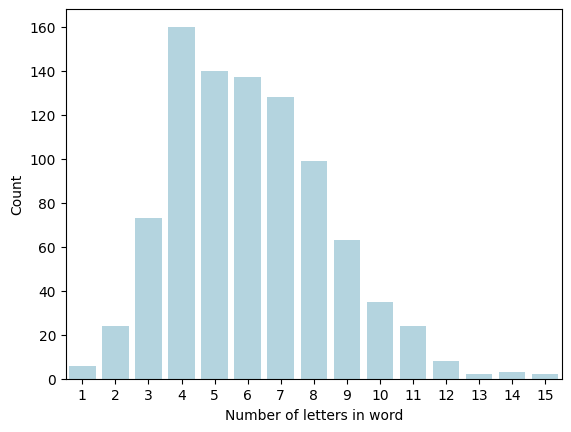

In [34]:
sns.barplot(data=n_words_df, x='n_letters', y='count', color='lightblue');
plt.xlabel("Number of letters in word");
plt.ylabel("Count");

## Сделайте функцию-переводчик с русского на "кирпичный язык"

In [35]:
def brick_lang(string):
    brick = re.sub(r'([аеёиоуыэюя])', r'\1к\1', string)
    return brick

In [36]:
brick_lang('всё равно татарский язык лучше всех')

'всёкё ракавноко такатакарскикий якязыкык лукучшеке всекех'

## Сделайте функцию для извлечения из текста предложений с заданным количеством слов (предлоги и союзы считаем за слова). 

In [37]:
def counter_words_in_sentence(n, text):
    sentences = []
    match = re.findall(fr'((([A-ZА-Я]([^ \.\?!]* ){{{n-1}}})([^ \.\?!]*))([\.\?!]))', text)
    if match: 
        for sentence in match:
            sentences.append(tuple(sentence[1].split()))
    return sentences
    

def n_word_sentence_finder(text, n, isfile=False):
    if isfile:
        with open(text) as file:
            sentences = file.read()
            return counter_words_in_sentence(n, sentences)
    else:
        return counter_words_in_sentence(n, text)

In [39]:
s = 'Здесь три слова. Тут тоже три!'

In [25]:
n_word_sentence_finder(s, n=3, isfile=False)

[('Здесь', 'три', 'слова'), ('Тут', 'тоже', 'три')]